<h1>Advanced Level Task</h1>
<h2>Task 7: Develop A Neural Network That Can Read Handwriting</h2>

<b>Name: Sumant Pujari</b>

In [1]:
#Importing packages
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2

# Import Dataset from MNIST

In [2]:
#import dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# Data Exploration

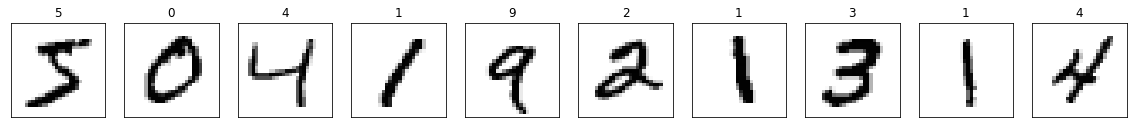

In [3]:
#Dataset properties
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(20, 30))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


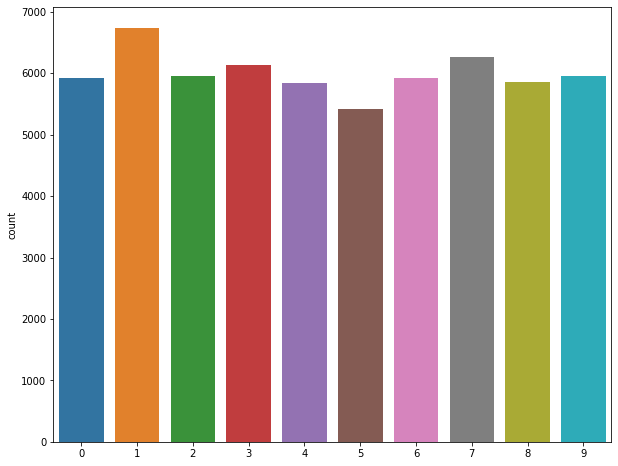

In [4]:
# number of images for each digit
plt.figure(figsize = (10,8))
sns.countplot(y_train)

In [5]:
# Dataset Size
print("Size of training set of X:",x_train.shape)
print("Size of testing set of X:",x_test.shape)
print("Size of training set of y:",y_train.shape)
print("Size of testing set of y:",y_test.shape)

Size of training set of X: (60000, 28, 28)
Size of testing set of X: (10000, 28, 28)
Size of training set of y: (60000,)
Size of testing set of y: (10000,)


# Pre-processing Data

In [6]:
# reshape datasets to further analysis
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
# new Size of datasets
print("New Size of training set of X:",x_train.shape)
print("New Size of testing set of X:",x_test.shape)

New Size of training set of X: (60000, 28, 28, 1)
New Size of testing set of X: (10000, 28, 28, 1)


In [8]:
#dataset normalization
x_train=x_train/255.0
x_test=x_test/255.0
num_classes = 10

# Building CNN model

In [9]:
# import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

**<h2>Model Architecture</h2>**
To increase CNN model accuracy based on the current dataset we are going add the following layers:
<li><b>Conv2D :</b> for the convolution layers
<li><b>Dropout :</b> to prevent overfitting
<li><b>Dense :</b> a fully connected layer
<li><b>Softmax activation :</b> This is used to get probability of accuracy which will be helpful optimal performance of the model.

**This model is going to have: CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)**

In [10]:
# intialize model to sequential type
model = Sequential()

# adding layers to the model
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [11]:
# model description
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

# Training the CNN model

In [12]:
# Train the model

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 771s 456ms/step - loss: 0.2461 - accuracy: 0.9281 - val_loss: 0.0947 - val_accuracy: 0.9808
Epoch 2/10
1688/1688 [==============================] - 748s 443ms/step - loss: 0.1056 - accuracy: 0.9698 - val_loss: 0.1032 - val_accuracy: 0.9810
Epoch 3/10
1688/1688 [==============================] - 745s 441ms/step - loss: 0.0867 - accuracy: 0.9746 - val_loss: 0.1113 - val_accuracy: 0.9808
Epoch 4/10
1688/1688 [==============================] - 728s 431ms/step - loss: 0.0710 - accuracy: 0.9795 - val_loss: 0.1063 - val_accuracy: 0.9843
Epoch 5/10
1688/1688 [==============================] - 726s 430ms/step - loss: 0.0624 - accuracy: 0.9817 - val_loss: 0.1199 - val_accuracy: 0.9823
Epoch 6/10
1688/1688 [==============================] - 729s 432ms/step - loss: 0.0567 - accuracy: 0.9830 - val_loss: 0.1675 - val_accuracy: 0.9790
Epoch 7/10
1688/1688 [==============================] - 735s 435ms/step - loss: 0.0495 - accuracy: 0.9853 - val_

In [13]:
# save model for future use
model.save('CNNmodel.h5')

# Evaluating the CNN model 

In [14]:
from tensorflow.keras.models import load_model
# load model from current working directory
model = load_model('/content/CNNmodel.h5')

In [15]:
# Evaluate the model
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 27s 86ms/step - loss: 0.1014 - accuracy: 0.9833
Test Loss 0.10137544572353363
Test Accuracy 0.983299970626831


# Plotting Training and Validation accuracy

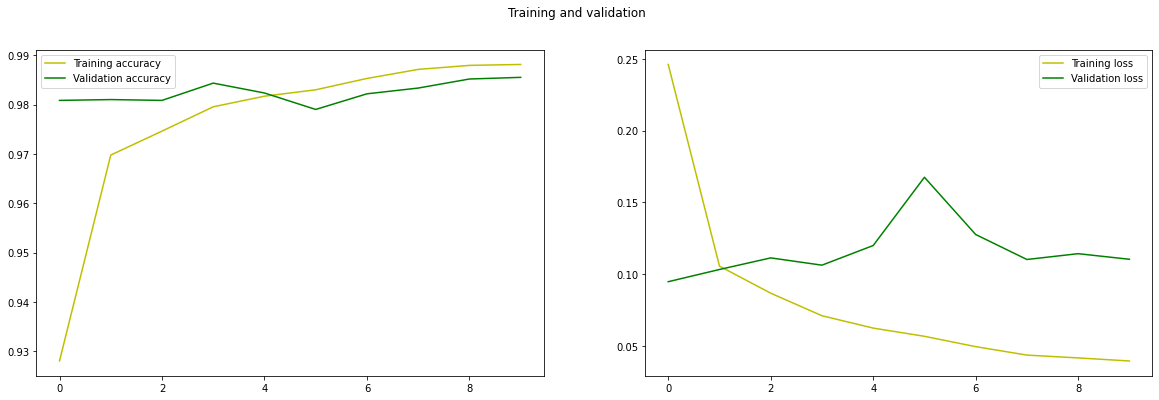

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

Text(69.0, 0.5, 'Truth')

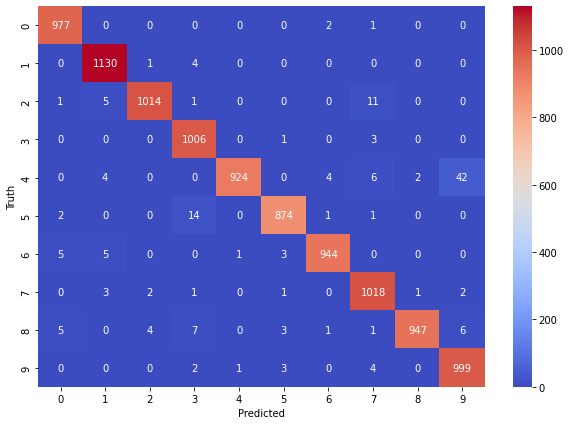

In [20]:
# Confusion Matrix
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
confuse_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sns.heatmap(confuse_mat, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Testing The CNN model

Predicted Value:  5


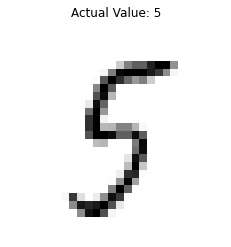

Successful prediction
──────────────────────────────────────────────────────────────────────────────────────────────────── 

Predicted Value:  3


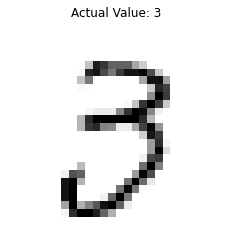

Successful prediction
──────────────────────────────────────────────────────────────────────────────────────────────────── 

Predicted Value:  2


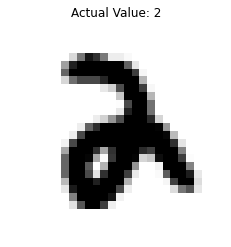

Successful prediction
──────────────────────────────────────────────────────────────────────────────────────────────────── 

Predicted Value:  6


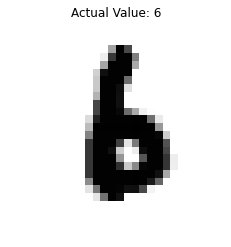

Successful prediction
──────────────────────────────────────────────────────────────────────────────────────────────────── 

Predicted Value:  0


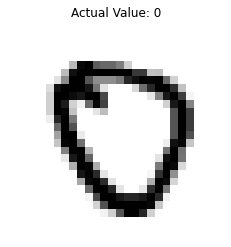

Successful prediction
──────────────────────────────────────────────────────────────────────────────────────────────────── 



In [18]:
# Testing the Model

#reshape the original test set
x_test = x_test.reshape(x_test.shape[0], 28, 28)


import random
for i in range(5):
  index=random.randint(0,len(x_test)-1)
  plt.imshow(x_test[index],cmap='gray_r')
  plt.title('Actual Value: {}'.format(y_test[index]))
  prediction=model.predict(x_test)
  plt.axis('off')
  print('Predicted Value: ',np.argmax(prediction[index]))
  plt.show()
  if(y_test[index]==(np.argmax(prediction[index]))):
    print('Successful prediction')
  else:
    print('Unsuccessful prediction')
  print(u'\u2500' * 100,'\n')


<b>Conclusion : </b><br>
<li> An optimal CNN model is developed to read handwritting.
<li> The accuracy of model can increased by adding layers or modifying current layer parameters.
<li> Accuracy also depends on the factors like dataset, training set, batch size, epochs, etc.